In [ ]:
import pandas as pd                                         # reading data from CSV files and used to analyse data
import numpy as np                                          #used for algebraic calculations and also working with arrays
from sklearn.metrics.pairwise import sigmoid_kernel         #computes the sigmoid kernel between two vectors.
from sklearn.metrics.pairwise import cosine_similarity      #computes the L2-normalized dot product of vectors
from sklearn import preprocessing                           #provides several common utility functions
#For Visualizations
import matplotlib.pyplot as plt                             #used for plotting and visualising data
import seaborn as sns                                       #for making statistical graphics in Python. It builds on top of matplotlib
import plotly.express as px                                 #provides functions to visualize a variety of types of data
%matplotlib inline                                          #sets the backend of matplotlib to the 'inline' backend 
import warnings                                             #used to show warnings messages
warnings.filterwarnings("ignore")

In [ ]:
# load the dataset
df=pd.read_csv("/content/drive/MyDrive/dataset.csv")
df.head(10)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,popularity,year
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,4,2021
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,5,2021
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,5,2021
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,3,2021
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,2,2021
5,5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake,6,2021
6,6,0.01450,0.739,241400,0.472,0.000007,1,0.2070,-11.204,1,0.1560,80.030,4,0.308,1,Childs Play,Drake,4,2021
7,7,0.02020,0.266,349667,0.348,0.664000,10,0.1600,-11.609,0,0.0371,144.154,4,0.393,1,Gyöngyhajú lány,Omega,2,2021
8,8,0.04810,0.603,202853,0.944,0.000000,11,0.3420,-3.626,0,0.3470,130.035,4,0.398,1,I've Seen Footage,Death Grips,0,2021
9,9,0.00208,0.836,226840,0.603,0.000000,7,0.5710,-7.792,1,0.2370,99.994,4,0.386,1,Digital Animal,Honey Claws,0,2021


In [ ]:
#Get the shape of the data (the number of rows & cols)
df.shape

(2017, 19)

In [ ]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
popularity          0
year                0
dtype: int64

In [ ]:
#description of the data in the DataFrame
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,popularity,year
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.535944,0.187590,0.618422,2.463564e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702,3.861676,2016.666832
std,583.288262,0.259989,0.161029,8.195271e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091,6.848213,3.152074
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000,0.000000,2012.000000
25%,504.000000,0.009630,0.514000,2.006250e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000,0.000000,2014.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000,0.000000,2016.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000,6.000000,2019.000000
max,2022.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000,55.000000,2022.000000


In [ ]:
#information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   int64  
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


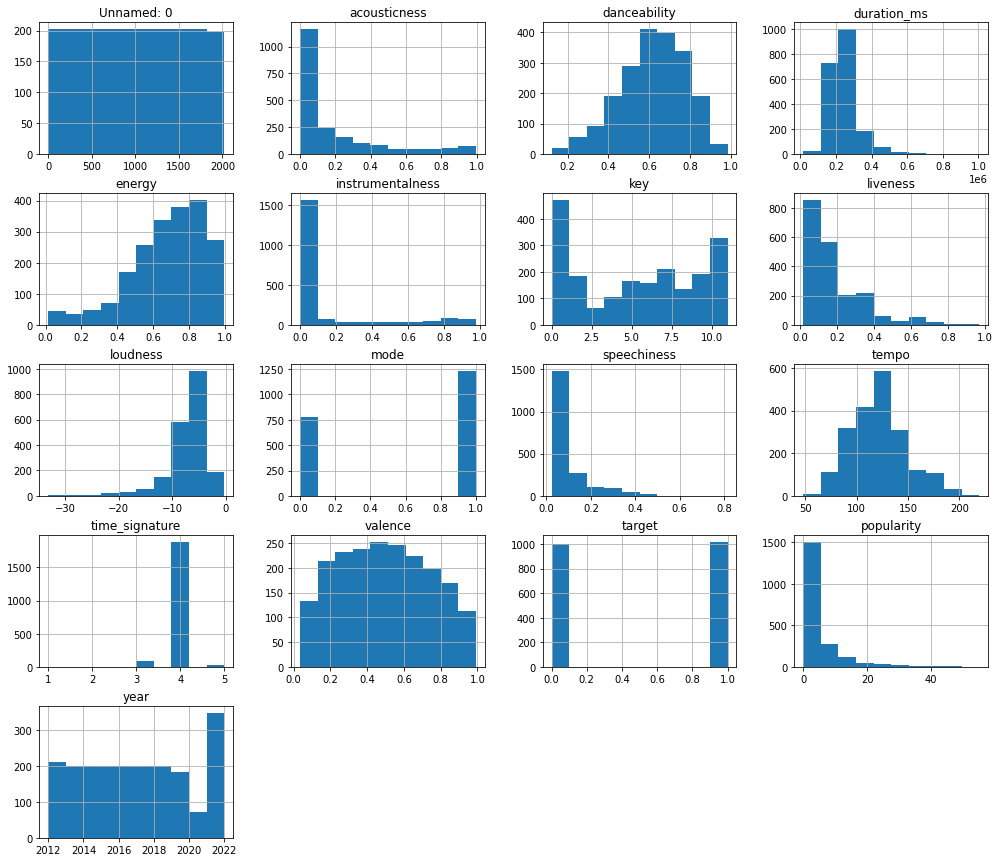

In [ ]:
#visualise the histogram
df.hist(figsize=(17,15))
plt.show()

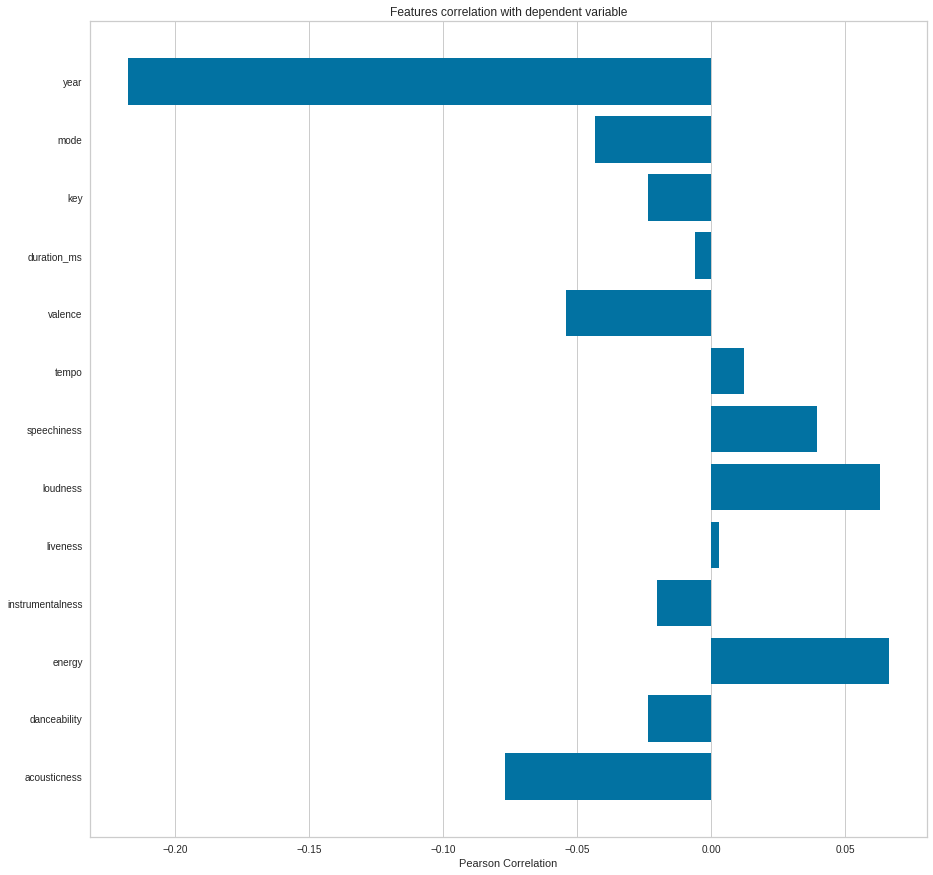

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode','year']

X, y = df[feature_names], df['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(15,15)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

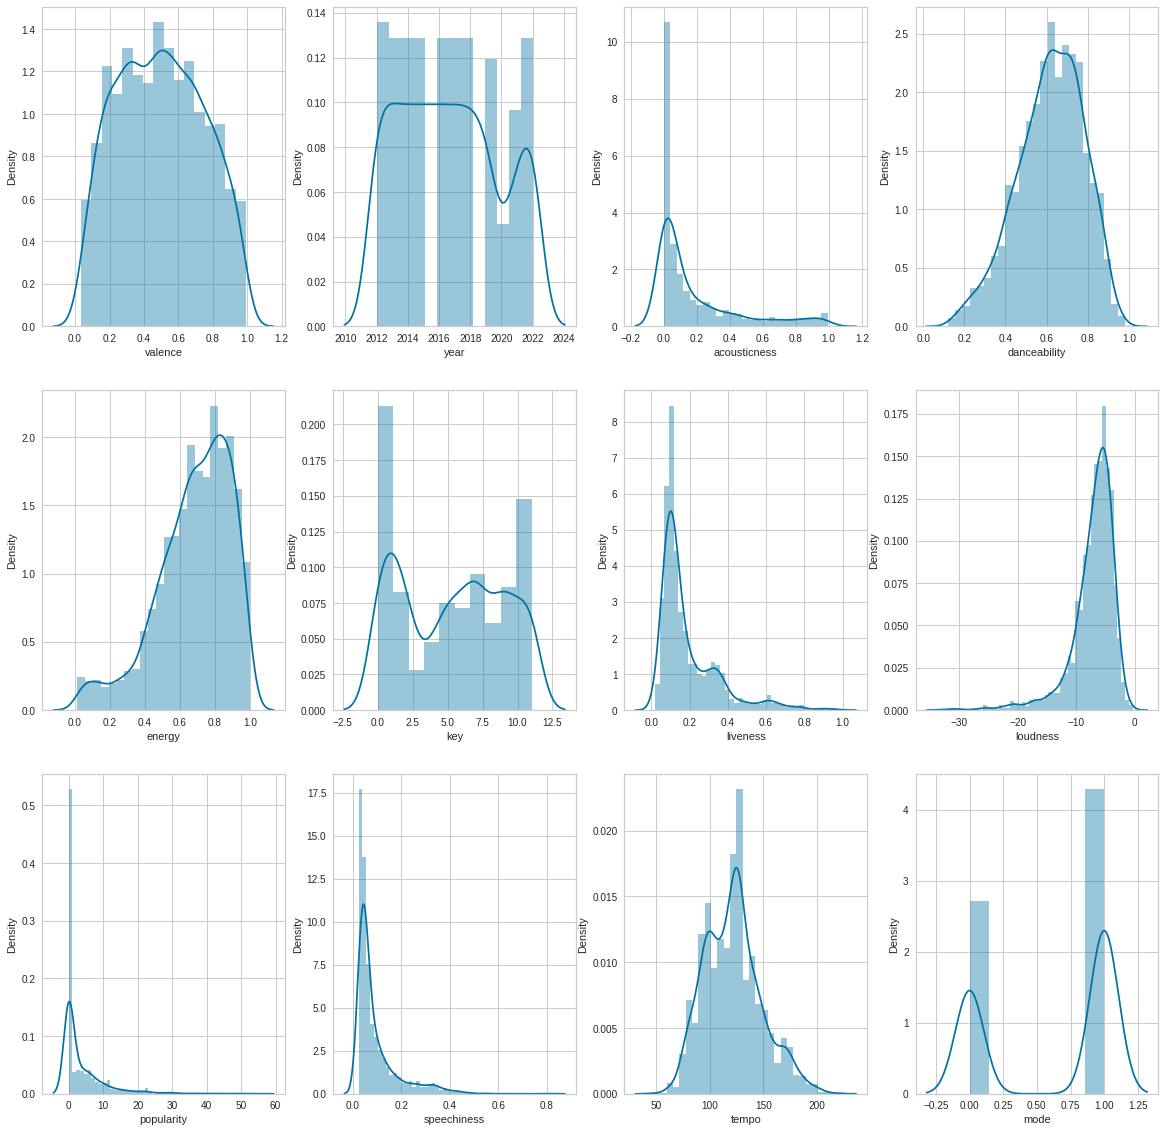

In [ ]:
#Visualisation of Variability for each column in the dataframe
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

In [ ]:
#get the correlation of the columns
df.corr()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,popularity,year
Unnamed: 0,1.000000,0.132689,-0.138980,-0.104068,-0.039583,-0.104929,-0.035539,-0.039185,0.022076,0.060826,-0.134946,-0.027816,-0.053040,-0.077379,-0.865583,0.057478,-0.719001
acousticness,0.132689,1.000000,-0.179894,0.071488,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627,-0.076865,-0.134341
danceability,-0.138980,-0.179894,1.000000,0.004914,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706,-0.023487,0.178295
duration_ms,-0.104068,0.071488,0.004914,1.000000,-0.144542,0.305464,0.023777,0.022905,-0.273782,-0.074910,-0.079601,-0.076300,-0.040072,-0.120031,0.146608,-0.006119,-0.019719
energy,-0.039583,-0.646319,0.038557,-0.144542,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688,0.066246,0.090953
instrumentalness,-0.104929,0.144397,-0.130561,0.305464,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594,-0.020104,-0.057315
key,-0.035539,-0.081037,0.022325,0.023777,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594,-0.023476,0.003288
liveness,-0.039185,-0.117126,-0.132044,0.022905,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364,0.002924,0.003276
loudness,0.022076,-0.562021,0.104362,-0.273782,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000,0.063125,0.084143
mode,0.060826,0.068028,-0.047867,-0.074910,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336,-0.043275,0.006930


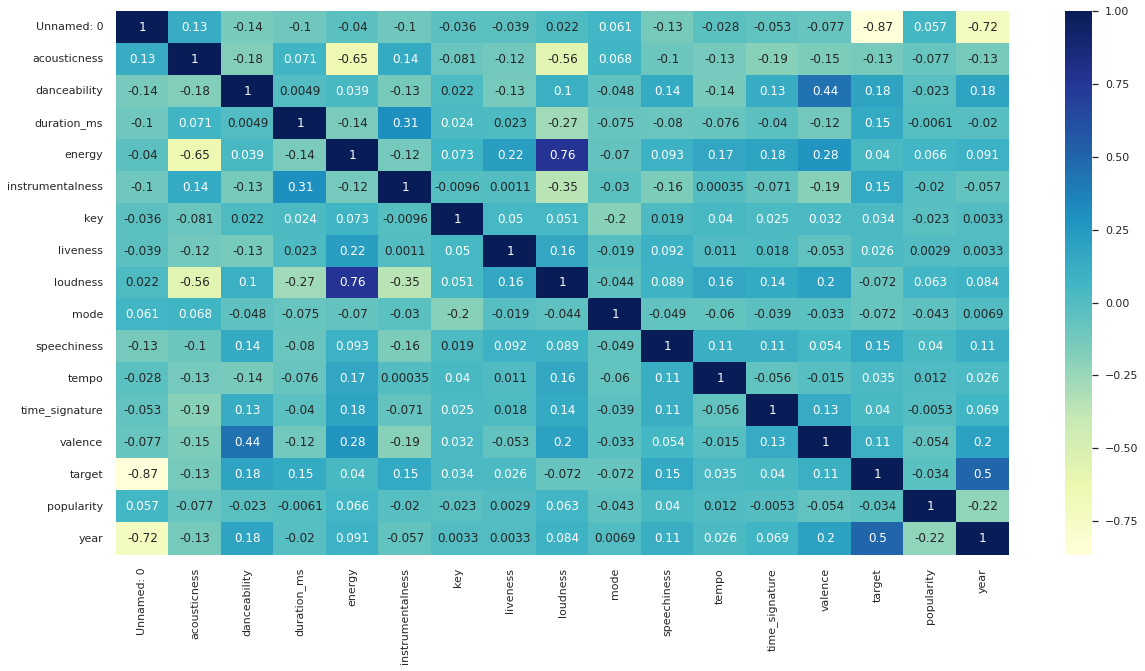

In [ ]:
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu',annot_kws={"fontsize":12})

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

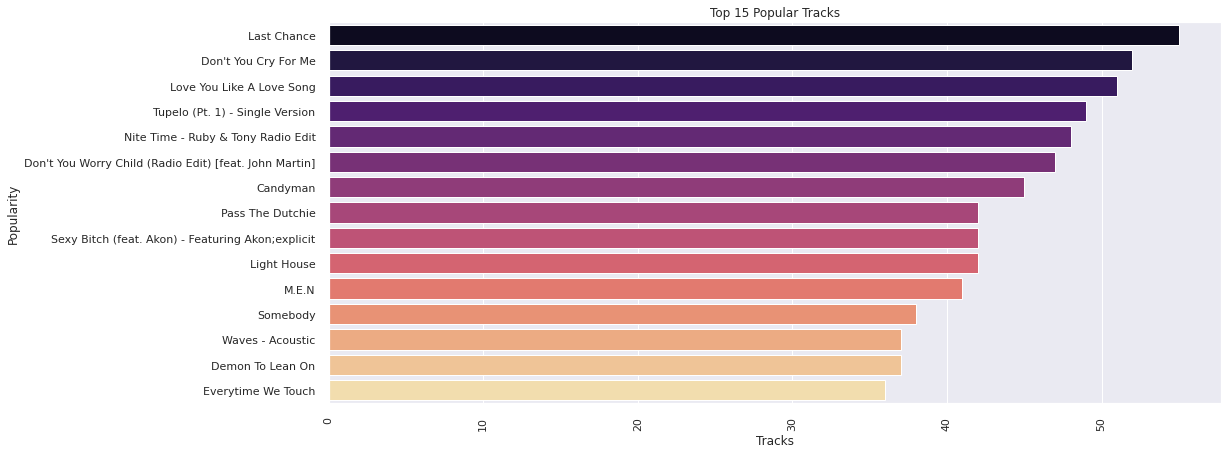

In [ ]:
#Most Popular Tracks
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("song_title")['popularity'].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(popular,popular.index,palette="magma",orient = 'h')
axis.set_title('Top 15 Popular Tracks')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

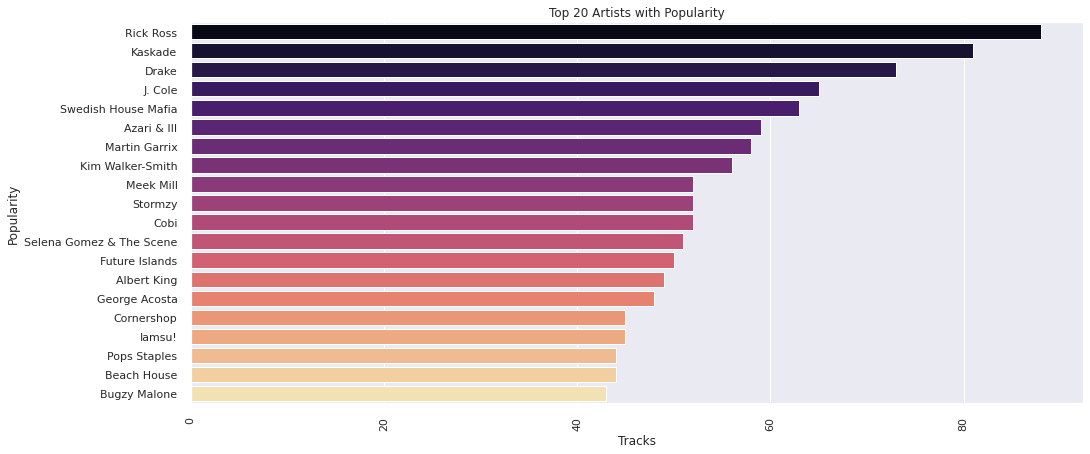

In [ ]:
#Most Popular Artists
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artist")['popularity'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(popular,popular.index,palette="magma",orient = 'h')
axis.set_title('Top 20 Artists with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

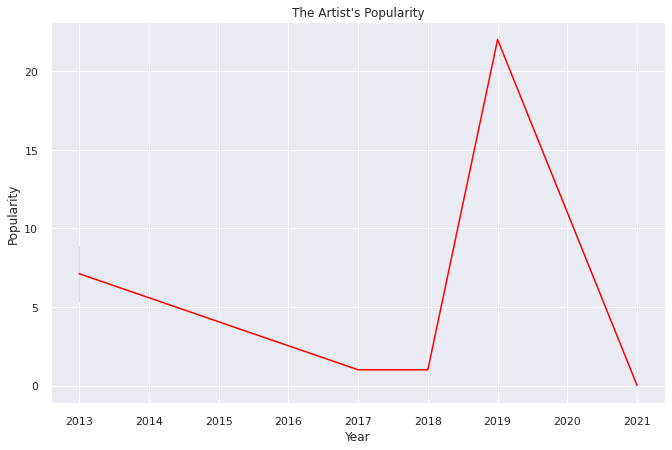

In [ ]:
# visualize the popularity of Rick Ross songs over the year
Rick = df[df['artist'] == 'Rick Ross']
plt.rcParams['figure.figsize'] = (11,7)
# line plot passing x,y
sns.lineplot(x='year', y='popularity', data=Rick, color='Red')
# Labels
plt.title("The Artist's Popularity")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

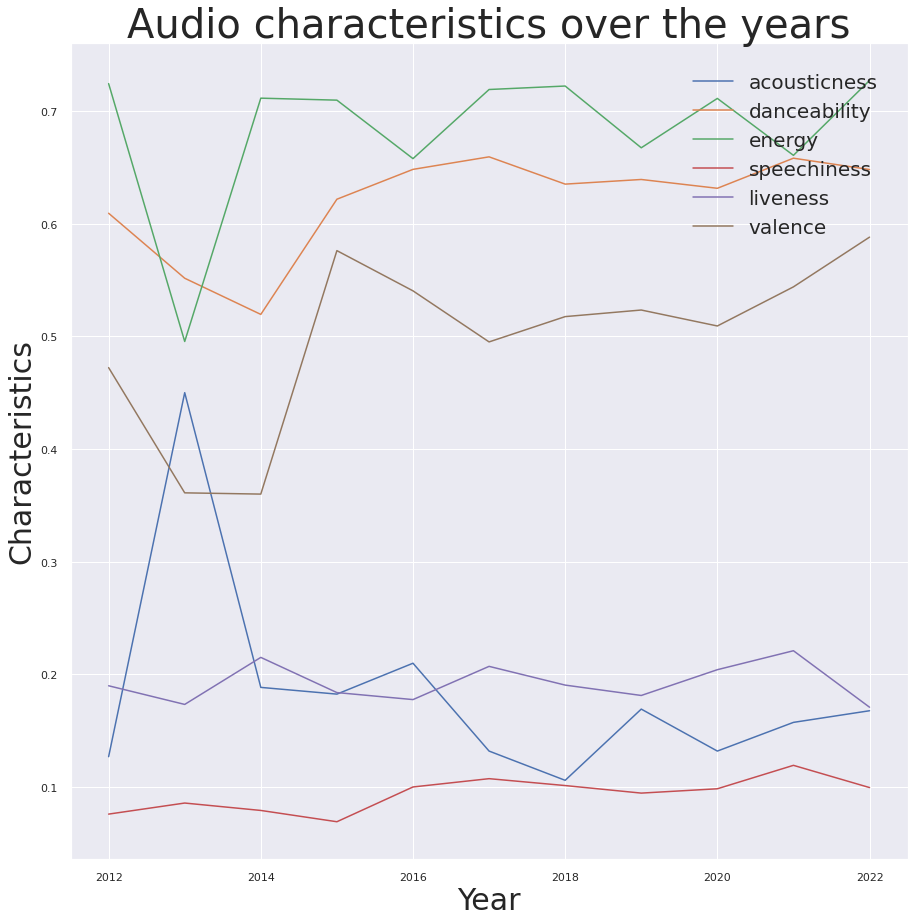

In [ ]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(15,15))
for c in columns:
    x = df.groupby('year')[c].mean()
    sns.lineplot(x.index,x,label=c)
plt.title('Audio characteristics over the years', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Characteristics',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 20}, loc = 'upper right')
plt.show()

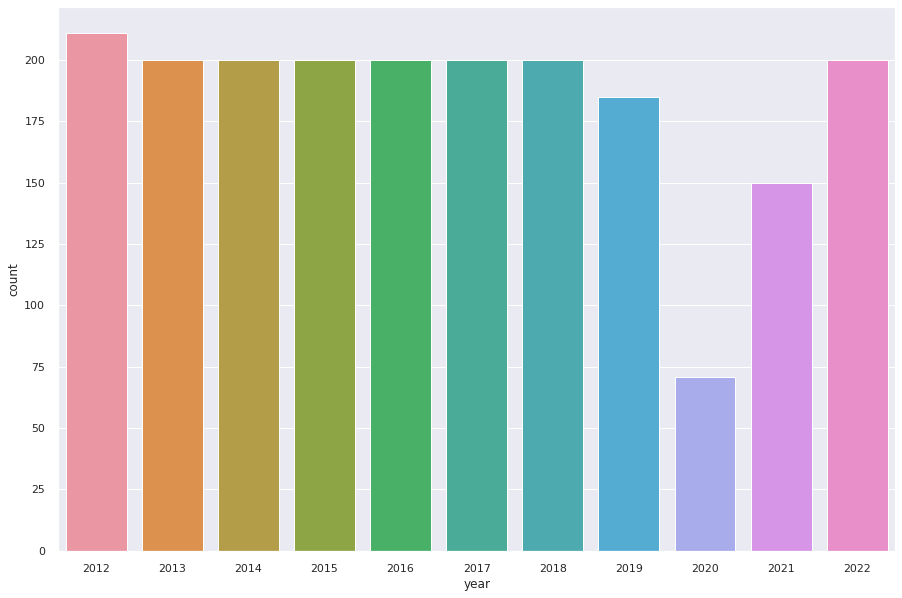

In [ ]:
#visualising the countplot
sns.set(rc={'figure.figsize':(15 ,10)})
sns.countplot(df['year'])

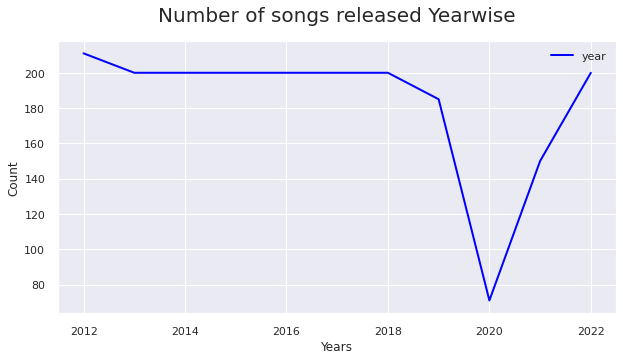

In [ ]:
year = pd.DataFrame(df['year'].value_counts())
year = year.sort_index()
ax=year.plot(kind='line',figsize=(10,5) ,color='blue', linewidth=2)
plt.title("Number of songs released Yearwise",y=1.05,fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count')
ax.axes.get_xaxis().set_visible(True)

In [ ]:
y=pd.DataFrame(df['artist'].value_counts().head(10)).reset_index()
y.columns=['Artists','Songs_Count']
y

,Artists,Songs_Count
0,Drake,16
1,Rick Ross,13
2,Disclosure,12
3,WALK THE MOON,10
4,Backstreet Boys,10
5,Crystal Castles,9
6,FIDLAR,9
7,Future,8
8,Fall Out Boy,8
9,Skrillex,8


In [ ]:
from sklearn.preprocessing import LabelEncoder           #to converting the labels into a numeric form
cols = ['song_title','artist']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head(n=5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,popularity,year
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,1043,449,4,2021
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,1334,222,5,2021
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,1906,449,5,2021
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,1044,95,3,2021
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,1243,628,2,2021


In [ ]:
data = df.drop(['song_title', 'duration_ms', 'Unnamed: 0','year','popularity'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split                       #Split arrays or matrices into random train and test subsets
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble,tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgboost
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

In [ ]:
X = data.drop(['target'], axis=1)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
print(confusion_matrix(y_test,y_lr))

[[157 115]
 [ 79 154]]


In [ ]:
#print the accuracy
print(accuracy_score(y_test,y_lr))

0.6158415841584158


In [ ]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       272
           1       0.57      0.66      0.61       233

    accuracy                           0.62       505
   macro avg       0.62      0.62      0.62       505
weighted avg       0.62      0.62      0.62       505



In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb = xgb.predict(X_test)
print(xgb.score(X_test,y_test))
print(classification_report(y_test, y_xgb))

0.7821782178217822
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       272
           1       0.74      0.81      0.77       233

    accuracy                           0.78       505
   macro avg       0.78      0.78      0.78       505
weighted avg       0.79      0.78      0.78       505



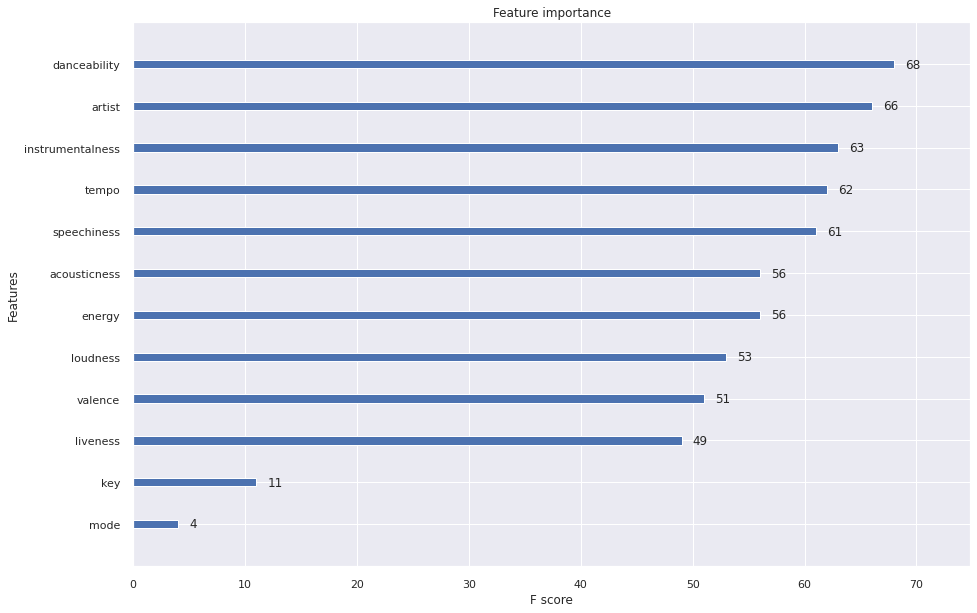

In [ ]:
xgboost.plot_importance(xgb)

In [ ]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
d_acc=accuracy_score(y_test,d_tree.predict(X_test))
print("Test Set Accuracy:"+str(accuracy_score(y_test,d_tree.predict(X_test))*100))
print(classification_report(y_test,d_tree.predict(X_test)))

Test Set Accuracy:73.46534653465346
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       272
           1       0.70      0.74      0.72       233

    accuracy                           0.73       505
   macro avg       0.73      0.73      0.73       505
weighted avg       0.74      0.73      0.73       505



In [ ]:
k_nei = KNeighborsClassifier()
k_nei.fit(X_train,y_train)
k_acc = accuracy_score(y_test,k_nei.predict(X_test))
print(accuracy_score(y_test,k_nei.predict(X_test)))
print(classification_report(y_test, k_nei.predict(X_test)))

0.5445544554455446
              precision    recall  f1-score   support

           0       0.59      0.51      0.55       272
           1       0.51      0.58      0.54       233

    accuracy                           0.54       505
   macro avg       0.55      0.55      0.54       505
weighted avg       0.55      0.54      0.54       505



In [ ]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print(accuracy_score(y_test, y_rf))
print(classification_report(y_test, y_rf))

0.7900990099009901
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       272
           1       0.75      0.81      0.78       233

    accuracy                           0.79       505
   macro avg       0.79      0.79      0.79       505
weighted avg       0.79      0.79      0.79       505



In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic','Random Forest', 'xgboost','KNN','Decision Tree'],
    'Score': [ accuracy_score(y_test,y_lr), accuracy_score(y_test, y_rf), xgb.score(X_test,y_test), accuracy_score(y_test,k_nei.predict(X_test)), accuracy_score(y_test,d_tree.predict(X_test))]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest,0.790099
2,xgboost,0.782178
4,Decision Tree,0.734653
0,Logistic,0.615842
3,KNN,0.544554


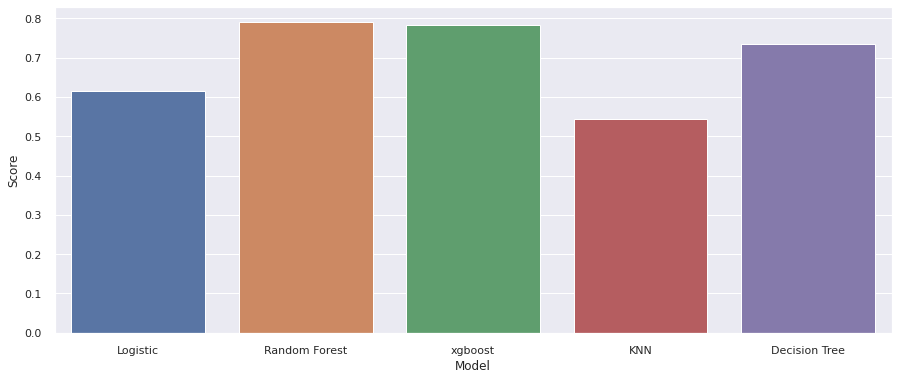

In [ ]:
#visualise the data
plt.figure(figsize=(15,6))
sns.barplot(x='Model',y='Score',data=models)
plt.show()

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,popularity,year
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,4,2021
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,5,2021
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,5,2021
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,3,2021
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,2,2021


In [ ]:
feature_cols=['acousticness', 'danceability', 'duration_ms', 'energy',
              'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
              'speechiness', 'tempo', 'time_signature', 'valence','popularity']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df =scaler.fit_transform(df[feature_cols])


In [ ]:
print(normalized_df[:2])

[[0.01024843 0.82482599 0.19073524 0.4263629  0.02243852 0.18181818
  0.15386234 0.74114059 1.         0.51444066 0.59603317 0.75
  0.26243209 0.07272727]
 [0.19999772 0.72041763 0.3144808  0.35008137 0.00626025 0.09090909
  0.12439486 0.69216224 1.         0.07100517 0.6544742  0.75
  0.57793565 0.09090909]]


In [ ]:
# Create a pandas series with song titles as indices and indices as series values 
indices = pd.Series(df.index, index=df['song_title']).drop_duplicates()

# Create cosine similarity matrix based on given matrix
cosine = cosine_similarity(normalized_df)

def generate_recommendation(song_title, model_type=cosine ):
    """
    Purpose: Function for song recommendations 
    Inputs: song title and type of similarity model
    Output: Pandas series of recommended songs
    """
    # Get song indices
    index=indices[song_title]
    # Get list of songs for given songs
    score=list(enumerate(model_type[index]))
    # Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    # Select the top-10 recommend songs
    similarity_score = similarity_score[1:11]
    top_songs_index = [i[0] for i in similarity_score]
    # Top 10 recommende songs
    top_songs=df['song_title'].iloc[top_songs_index]
    return top_songs

In [ ]:
print("Recommended Songs:")
print(generate_recommendation('Master Of None',cosine).values)

Recommended Songs:
['Walk With Me' 'Baby' 'Jackie Gets Out' 'No Woman' 'Good Morning.Goodbye'
 'Old Folks' 'Count Your Blessings'
 'The Great Gig In The Sky - 2011 Remastered Version' 'You Go To My Head'
 'Uncast Shadow Of A Southern Myth']


In [ ]:
# Create sigmoid kernel matrix based on given matrix
sig_kernel = sigmoid_kernel(normalized_df)

print("Recommended Songs:")
print(generate_recommendation('Parallel Lines',sig_kernel).values)

Recommended Songs:
['Inspector Norse' 'Trap Shit V7' 'GodLovesUgly'
 'Blueberry (Pills & Cocaine) (feat. Danny Brown)'
 'Dreams Never End - 2015 Remastered Version' 'Nimble Girl' 'Lazuli'
 'Fail to Cry' 'Au Seve' 'Giant']


In [ ]:
print("Recommended Songs:")
print(generate_recommendation('Last Chance',cosine).values)

Recommended Songs:
['All Aloud' 'Scared To Be Lonely (Conro Remix)'
 'Blackout - Madison Mars Radio Mix' "Can't Take It" 'Counting Stars'
 'Light House' 'Brightside - Borgeous Remix'
 "Don't You Worry Child (Radio Edit) [feat. John Martin]"
 'Never Be Your Woman (Shy FX Radio Edit) [feat. Emeli Sandé]' 'Waiting']


In [ ]:
print("Recommended Songs:")
print(generate_recommendation('Jumpman',cosine).values)

Recommended Songs:
['No Security' 'Flashing Lights'
 "Sittin' Sidewayz - feat. Big Pokey Explicit" 'Zion Gate Dub' 'Murderer'
 'Wearing My Rolex - Radio Edit' "Don't Cha"
 'My Love Is Like...Wo - Main Mix/Album Version' 'I Gotta Feeling'
 'Young N*****']


In [ ]:
print("Recommended Songs:")
print(generate_recommendation("It's My Party",cosine).values)

Recommended Songs:
['To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)' 'Happy People'
 'Can You Get To That' 'Last Kiss' 'Be Brave' 'Deja vu'
 'No Such Thing as a Broken Heart' 'Dangerous' 'Smoke' 'San Francisco']
